In [101]:
import pandas as pd
import os
import plotting
import importlib
importlib.reload(plotting)
pd.options.display.max_rows = 4000
import numpy as np

In [102]:
def load_data(data_src):
    curve_data = [] # used for plotting
    filename_list = []
    for filename in os.listdir(data_src):
        df = pd.read_csv(f"{data_src}/{filename}")
        curve_data.append(df)
        filename_list.append(filename)
    return curve_data, filename_list

data_src = "data/cleaned_data"
curve_data, filename_list = load_data(data_src)
filename_to_depth_resist = dict(zip(filename_list, curve_data))

In [103]:
# ylabel_name = 'marions_ylabels_esd_removed'
ylabel_name = 'marions_ylabels'
data_features = pd.read_csv("data/optimal_features.csv")
clustering_features = plotting.extract_numerical_features(data_features)

In [104]:
# ylabel_name = 'marions_ylabels_deduction'
ylabel_to_cluster_num = {'Outlier':-1, 'ES-B':0, 'ES-BW':1, 'ES-S':2, 'ES-S-Plates':3, 'ES-D':4, 'LS':5, 'F':6, 'LS/F':7, 'ES-DB':8, 'ES': 9}
cluster_num_to_ylabel = {v: k for k, v in ylabel_to_cluster_num.items()}
data_features[f'{ylabel_name}_nums'] = data_features[ylabel_name].map(ylabel_to_cluster_num)
marions_labeled_data = data_features[data_features[ylabel_name].notna()].copy() # removes NaN's which correspond to non-labled data

# Split Based on Popcorn

/home/liam-bouffard/anaconda3/envs/env3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but NearestCentroid was fitted without feature names
  warnings.warn(


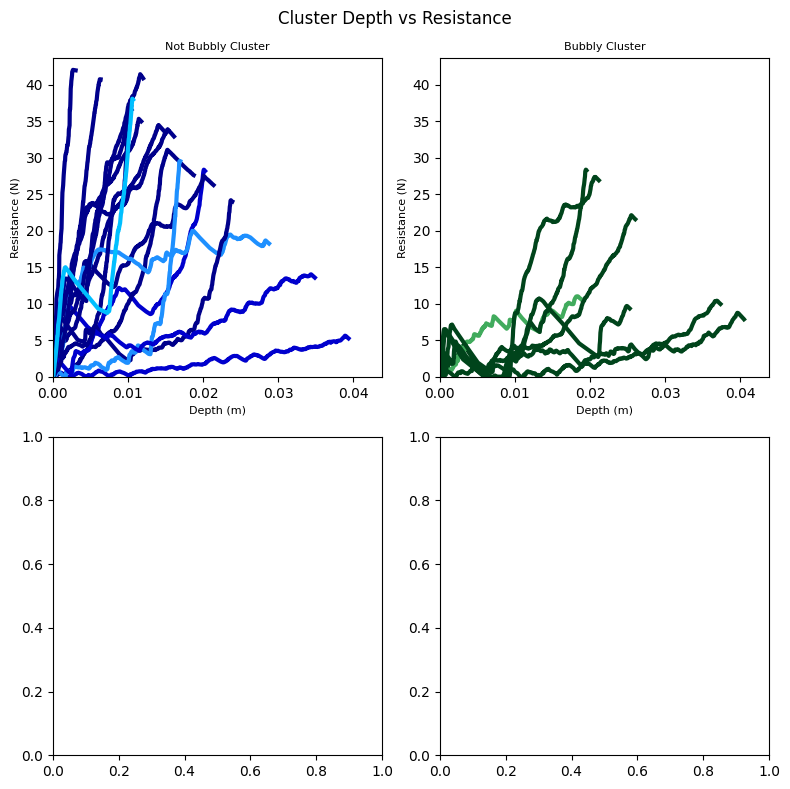

In [105]:
from sklearn.neighbors import NearestCentroid

ylabel_name = "popcorn"
data_with_popcorn_label = data_features[data_features['popcorn'].notna()]

train_x = plotting.extract_numerical_features(data_with_popcorn_label).values
train_y = data_with_popcorn_label['popcorn'].astype(int)

nc = NearestCentroid()
nc.fit(train_x, train_y)

nc_predictions = pd.Series(nc.predict(clustering_features.values))
proba = np.round(nc.predict_proba(clustering_features), 2)

# proba = pd.DataFrame(data=proba, columns=nc.classes, index=data_without_op)
centroids = pd.DataFrame(data=nc.centroids_, columns=clustering_features.columns)
centroids[f'{ylabel_name}_nums'] = nc.classes_

# plotting labeled data only
plotting.plot_cluster_subplots(
                            train_y, 
                            curve_data, 
                            cluster_category_names=["Not Bubbly", "Bubbly"], 
                            bold_idxs=train_y.index,
                            prediction_proba=proba)
# plotting.plot_pca(numerical_features, y, 3, "", ylabel_name, centroids=centroids)

# plotting labeled with predictions